In [1]:
import pandas as pd
import numpy as np
#%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from operator import attrgetter
from matplotlib.patches import Ellipse
from math import atan2,degrees
import numpy.random as rnd

In [2]:
points = pd.read_csv('Clustering.csv',sep=',')

In [3]:
class CenterValue:
    def __init__ (self,p,val,lab):
        self.value=val
        self.point=p
        self.label=lab
    def __str__(self):
        return 'point:{},Value:{},index:{}'.format(self.point,self.value,self.label)

In [4]:
def Distance(p1,p2indx):
    p1 = np.array(p1)
    p2 = np.array((points.X[p2indx],points.Y[p2indx]))
    return np.linalg.norm(p1-p2)

In [5]:
def K_mean(centerpoints):
    centers={}
    for i in centerpoints:
        centers[i]=[]
    for i in range(len(points.index)):
        values=[]
        values.append(CenterValue(centerpoints[0],Distance(centerpoints[0],i),i))
        values.append(CenterValue(centerpoints[1],Distance(centerpoints[1],i),i))
        values.append(CenterValue(centerpoints[2],Distance(centerpoints[2],i),i))
        values.append(CenterValue(centerpoints[3],Distance(centerpoints[3],i),i))
        values.sort(key=lambda x: x.value, reverse=False)
        centers[values[0].point].append(GetPointsList([i])[0])
    return centers     

In [6]:
def GetPointsList(Indexs):
    lst=[]
    for i in Indexs:
        lst.append((points.X[i],points.Y[i]))
    return lst

In [7]:
def Get_Means(dictionary_of_lists):
    lst=[]
    for i in dictionary_of_lists.keys():
        mX=0
        mY=0
        for p in dictionary_of_lists[i]:
            mX+=p[0]
            mY+=p[1]
        lst.append((mX/len(dictionary_of_lists[i]),mY/len(dictionary_of_lists[i])))
    return lst

In [19]:
def Plot(k):
    keys = k.keys()
    fig = plt.figure(0)
    ax = fig.add_subplot(111, aspect='equal')
    ax.plot([t[0] for t in k[keys[0]]], [t[1] for t in k[keys[0]]], 'rs')
    ax.plot([t[0] for t in k[keys[1]]], [t[1] for t in k[keys[1]]], 'bs')
    ax.plot([t[0] for t in k[keys[2]]], [t[1] for t in k[keys[2]]], 'gs')
    ax.plot([t[0] for t in k[keys[3]]], [t[1] for t in k[keys[3]]], 'ms')
    for k in keys:
        ax.plot(k[0],k[1],'k*')
        ax.annotate('Cntr',(k[0],k[1]))
    ax.axis([0, 10, 0,10])
    plt.show()

In [21]:
#First Iteration
k = K_mean(GetPointsList(range(4)))
Plot(k)

In [29]:
#Each Time new Iteration
k = Get_Means(k)
k = K_mean(k)
Plot(k)

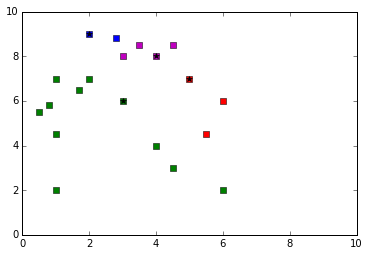

In [181]:
?plt.plot

In [10]:
?plt.Annotation

In [12]:
for i, txt in enumerate(range(10)):
    print type(i),type(txt)

<type 'int'> <type 'int'>
<type 'int'> <type 'int'>
<type 'int'> <type 'int'>
<type 'int'> <type 'int'>
<type 'int'> <type 'int'>
<type 'int'> <type 'int'>
<type 'int'> <type 'int'>
<type 'int'> <type 'int'>
<type 'int'> <type 'int'>
<type 'int'> <type 'int'>
